# Visualize the feature importance and feature selection process
- Regression based approach, such as Ridge regression, LASSO, Elastic Net or LARS

- Decision tree based approach (random forest, XGBoost)

Team META
* Akhilesh Dongre
* Krishnanand Jha
* Janhvi Shah
* Manav Malavia
* Jaimeen Unagar



## Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import math
from xgboost import XGBRegressor
import math
from sklearn.linear_model import Lasso
import statsmodels.api as sm
from sklearn.linear_model import ElasticNet

pd.set_option("display.max_columns", None)
plt.rcParams["figure.figsize"] = (15, 20)

## Train & Test Data Split

In [ ]:
meta = pd.read_csv("/content/META_feature_mart (3).csv")
meta.columns
meta.set_index("Date", inplace=True)


In [ ]:
meta

,Unnamed: 0,Mkt-RF,SMB,HML,RMW,CMA,RF,ADS_Index,SP500,T10Y3M,OBMMIJUMBO30YF,DEXUSEU,DEXJPUS,DEXUSUK,CBBTCUSD,CBETHUSD,T10YIE,DCOILBRENTEU,VIXCLS,DAAA,DBAA,NIKKEI225,AMERIBOR,T5YIE,BAMLH0A0HYM2,BAMLH0A0HYM2EY,DGS10,DGS1,RIFSPPFAAD90NB,DCPN3M,DCPF1M,DCOILWTICO,DHHNGSP,USRECD,USRECDM,USRECDP,Date.1,Open,High,Low,Close,Adj Close,Volume,Returns,Daily_Return,Typical_Price,Typical_Price_Return,Volume_Log,Volume_Differencing,Volume_Differencing_10,Volumne_Percent_Change,MA_5,Volumne_MA_200,Close_EMA_50,Momentum_AwesomeOscillatorIndicator,Momentum_KAMA,Momentum_PercentagePVolumneOscillator,Trend_ADX,Trend_AroonIndicator,Trend_CCI,Trend_DPO,Trend_EMA,Volumne_CMF,Volumne_EOM,Volumne_FI,Volatility_ATR,Volatility_BB,Volatility_DonchainChannel
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-03,0,0.73,0.43,0.78,-1.17,0.60,0.000,-0.457452,4796.56,1.55,3.212,1.1290,115.27,1.3469,46519.76,3772.86,2.60,78.25,16.60,2.79,3.45,29237.723931,0.14269,2.95,3.05,4.42,1.63,0.40,0.140000,3.775272,0.080000,75.99,3.74,0.0,0.0,0.0,2022-01-03,338.299988,341.079987,337.190002,338.540009,338.181183,14537900,0.098935,0.000272,338.936666,0.027793,16.492270,1.083090e+04,-1.605996e+04,0.063048,17.102415,-0.129738,0.000000,2.962716,224.738314,-1.827331,0.000000,15.418327,23.678581,-0.315160,222.209561,0.012340,4.278403,-2.344605e+07,0.000000,20.717792,20.204587
2022-01-04,1,-0.29,-0.07,3.62,0.63,1.47,0.000,-0.470161,4793.54,1.58,3.286,1.1296,116.12,1.3544,45889.40,3787.96,2.57,79.39,16.91,2.82,3.50,29301.790000,0.10545,2.93,3.09,4.46,1.66,0.38,3.509215,3.775272,0.090000,77.00,3.73,0.0,0.0,0.0,2022-01-04,339.950012,343.089996,331.869995,336.529999,336.173309,15998000,-2.007874,-0.005955,337.163330,-0.524579,16.587974,1.460100e+06,-1.605996e+04,0.100434,17.102415,-0.129738,-0.002918,2.962716,224.738314,-1.827331,0.000000,15.418327,23.678581,-0.315160,222.209561,0.012340,-116.071311,-2.344605e+07,0.000000,20.717792,20.204587
2022-01-05,2,-2.28,-0.94,2.60,1.41,1.22,0.000,-0.480353,4700.58,1.62,3.265,1.1335,115.91,1.3573,43422.85,3535.85,2.53,80.60,19.73,2.84,3.51,29332.160000,0.10988,2.87,3.07,4.50,1.71,0.41,0.180000,3.775272,3.242937,77.83,3.78,0.0,0.0,0.0,2022-01-05,333.019989,335.760010,323.839996,324.170013,323.826416,20564500,-12.346893,-0.037419,327.923340,-2.778761,16.839077,4.566500e+06,-1.605996e+04,0.285442,17.102415,-0.129738,-0.026188,2.962716,224.738314,-1.827331,0.000000,15.418327,23.678581,-0.315160,222.209561,0.012340,-445.163344,-2.344605e+07,0.000000,20.717792,20.204587
2022-01-06,3,0.00,0.38,1.75,-0.55,-0.02,0.000,-0.488034,4696.05,1.63,3.399,1.1307,115.78,1.3539,43133.33,3414.52,2.46,81.99,19.61,2.81,3.51,28487.870000,0.09537,2.77,3.15,4.62,1.73,0.45,0.160000,3.775272,0.060000,79.47,3.94,0.0,0.0,0.0,2022-01-06,322.820007,339.170013,322.720001,332.459991,332.107635,27962800,8.281219,0.025252,331.450002,1.069711,17.146386,7.398300e+06,-1.605996e+04,0.359761,17.102415,-0.129738,-0.000944,2.962716,224.738314,-1.827331,0.000000,15.418327,23.678581,-0.315160,222.209561,0.012340,67.358542,-2.344605e+07,0.000000,20.717792,20.204587
2022-01-07,4,-0.48,-0.96,2.02,-0.12,0.85,0.000,-0.493205,4677.03,1.66,3.340,1.1358,115.61,1.3583,41656.16,3205.81,2.48,82.28,18.76,2.88,3.54,28478.560000,0.09395,2.78,3.20,4.69,1.76,0.43,0.180000,3.775272,3.242937,79.00,3.83,0.0,0.0,0.0,2022-01-07,332.739990,337.000000,328.880005,331.790009,331.438354,14722000,-0.669281,-0.002017,332.556671,0.333331,16.504854,-1.324080e+07,-1.605996e+04,-0.473515,16.747080,-0.129738,-0.002319,2.962716,224.738314,-1.827331,0.000000,15.418327,23.678581,-0.315160,222.209561,0.012340,110.034986,-2.344605e+07,0.000000,20.717792,20.204587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-25,517,0.46,0.20,0.56,-0.19,0.55,0.022,-0.387875,4894.

In [ ]:

meta = pd.read_csv("/content/META_feature_mart (3).csv")
meta.set_index("Date", inplace=True)
meta.drop(columns=["Unnamed: 0"], inplace=True)
meta.drop(columns=["Date.1"], inplace=True)

meta.index = pd.to_datetime(meta.index)
meta = meta[meta.index >= pd.to_datetime("2022-01-01")]
split_date = pd.to_datetime("2023-07-31")

df_train = meta[meta.index <= split_date]
df_test = meta[meta.index > split_date]

print(f"Number of rows in df_train: {len(df_train)}")
print(f"Number of rows in df_test: {len(df_test)}")

columns_to_keep = []
columns_to_drop = ["Open", "High", "Low", "Typical_Price", "Adj Close"]

X_train = df_train.loc[:, df_train.columns != "Close"][:-1]
X_train = X_train.drop(columns_to_drop, axis=1)
y_train = df_train["Close"].shift(-1)[:-1]

X_test = df_test.loc[:, df_test.columns != "Close"][:-1]
X_test = X_test.drop(columns_to_drop, axis=1)
y_test = df_test["Close"].shift(-1)[:-1]

Number of rows in df_train: 395
Number of rows in df_test: 127


## Ordinary Least Squares (OLS) Regression

In [ ]:
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)
OLS_Model = sm.OLS(y_train, X_train_const).fit()
print(OLS_Model.summary())
y_pred = OLS_Model.predict(X_test_const)

MSE = mean_squared_error(y_test, y_pred, squared=False)
RMSE = math.sqrt(MSE)


print(RMSE)

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     364.8
Date:                Fri, 19 Apr 2024   Prob (F-statistic):          1.13e-269
Time:                        02:51:45   Log-Likelihood:                -1348.0
No. Observations:                 394   AIC:                             2812.
Df Residuals:                     336   BIC:                             3043.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

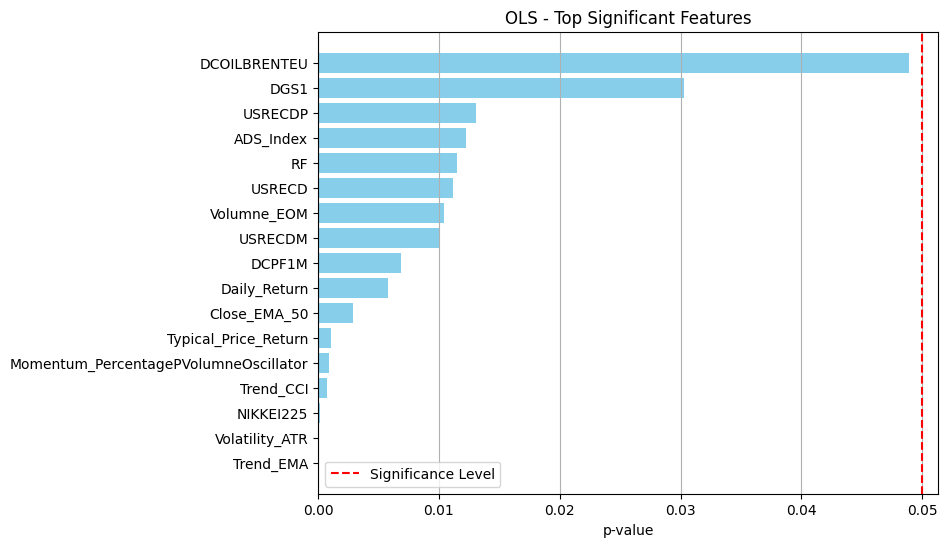

In [ ]:
# Extract p-values
p_values_ols = OLS_Model.pvalues

# Set a significance level (e.g., 0.05)
significance_level = 0.05

# Get indices of significant features based on p-values
significant_features_indices_ols = [i for i, p_val in enumerate(p_values_ols) if p_val < significance_level]

# Get the names of significant features and their corresponding p-values
significant_features_ols = [X_train_const.columns[i] for i in significant_features_indices_ols]
significant_p_values_ols = [p_values_ols[i] for i in significant_features_indices_ols]

# Sort features based on their p-values
sorted_indices_ols = np.argsort(significant_p_values_ols)  # Sort indices in ascending order of p-values

sorted_features_ols = [significant_features_ols[i] for i in sorted_indices_ols]
sorted_p_values_ols = [significant_p_values_ols[i] for i in sorted_indices_ols]

# Plotting
plt.figure(figsize=(8, 6))
plt.barh(sorted_features_ols, sorted_p_values_ols, color='skyblue')
plt.xlabel('p-value')
plt.title('OLS - Top Significant Features')
plt.axvline(x=significance_level, color='red', linestyle='--', label='Significance Level')
plt.legend()
plt.grid(axis='x')
plt.show()


1. DCOILBRENTEU (Crude Oil Prices): Typically, technology companies like Meta are not directly affected by oil prices as much as manufacturing or transportation companies. However, large fluctuations in oil prices can impact the broader economy and market sentiment, indirectly affecting Meta’s stock. For instance, high oil prices could lead to lower overall economic growth, which could reduce advertising spending—a key revenue source for Meta.
2. DGS1 (1-Year Treasury Rate): This represents short-term interest rates. If interest rates rise, the cost of capital increases, and investors may shift investment from stocks to bonds for better risk-adjusted returns. For Meta, a high-growth company, rising rates could mean a higher discount rate applied to future cash flows, potentially lowering the stock's present value.
3. USRECDP (US Recession Indicator): During a recession, advertising budgets are typically cut as businesses tighten spending, which could lead to decreased revenue for Meta given its reliance on advertising income.
4. ADS_Index (Economic Conditions Indicator): The ADS Index includes variables like employment, industrial production, and others to gauge economic activity. A robust economy could increase business activity and consumer spending, likely benefiting Meta with higher advertising revenues.

## Lasso

In [ ]:
model = Lasso(alpha=0.5, fit_intercept=False).fit(X_train, y_train)
selected_columns = X_train.columns[np.abs(model.coef_) >= 0.001]
X_train_selected = X_train[selected_columns]
X_test_selected = X_test[selected_columns]

Lasso_Model = sm.OLS(y_train, sm.add_constant(X_train_selected)).fit()
y_pred = Lasso_Model.predict(sm.add_constant(X_test_selected))
corr_model = np.corrcoef(y_pred, y_test, rowvar=False)[0, 1]

MSE = mean_squared_error(y_test, y_pred)
RMSE = math.sqrt(MSE)

print(Lasso_Model.summary())

print(RMSE)

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     601.2
Date:                Fri, 19 Apr 2024   Prob (F-statistic):          9.28e-285
Time:                        02:51:46   Log-Likelihood:                -1412.4
No. Observations:                 394   AIC:                             2881.
Df Residuals:                     366   BIC:                             2992.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.832e+04, tolerance: 1.633e+03
  model = cd_fast.enet_coordinate_descent(


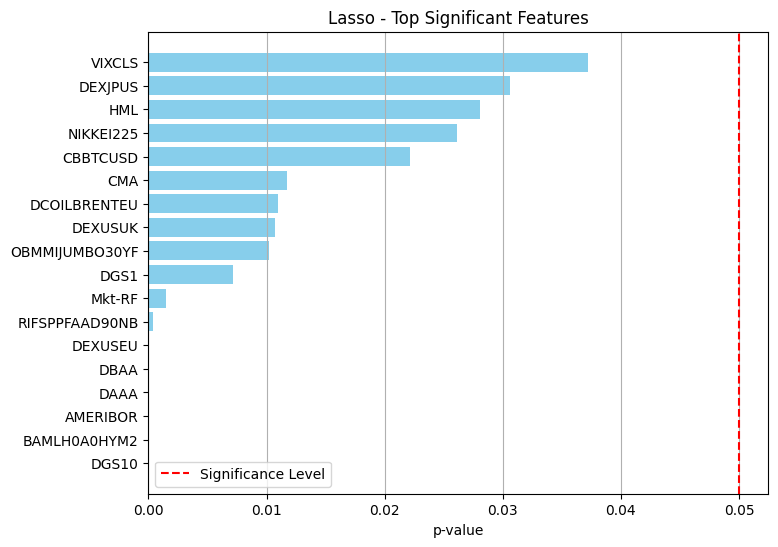

In [ ]:
p_values = Lasso_Model.pvalues

# Set a significance level (e.g., 0.05)
significance_level = 0.05

# Get indices of significant features based on p-values
significant_features_indices = [i for i, p_val in enumerate(p_values) if p_val < significance_level]

# Get the names of significant features and their corresponding p-values
significant_features = [X_train.columns[i] for i in significant_features_indices]
significant_p_values = [p_values[i] for i in significant_features_indices]

# Sort features based on their p-values
sorted_indices = np.argsort(significant_p_values)  # Sort indices in ascending order of p-values

sorted_features = [significant_features[i] for i in sorted_indices]
sorted_p_values = [significant_p_values[i] for i in sorted_indices]

# Plotting
plt.figure(figsize=(8, 6))
plt.barh(sorted_features, sorted_p_values, color='skyblue')
plt.xlabel('p-value')
plt.title('Lasso - Top Significant Features')
plt.axvline(x=significance_level, color='red', linestyle='--', label='Significance Level')
plt.legend()
plt.grid(axis='x')
plt.show()


1. VIXCLS: This appears to be the VIX, a measure of market volatility often referred to as the "fear index." Higher VIX values generally correspond to higher market volatility and uncertainty, which can negatively impact stock prices including META.
2. DEXJPUS: This is likely the USD/JPY exchange rate. Fluctuations in this rate could impact multinational companies like Meta, affecting their international earnings when repatriated.
3. HML: High Minus Low factor from Fama-French three-factor model, representing the size premium in stocks. It suggests that stocks with high book-to-market values (value stocks) perform differently than low book-to-market values (growth stocks). The impact on Meta would depend on its current market valuation relative to its book value.
4. NIKKEI225: Japan’s stock market index. Its movement could indicate global economic health or investor sentiment, which could correlate with META's performance in global markets.

## Elastic Net

In [ ]:


model = ElasticNet(alpha=1.0, fit_intercept=False).fit(X_train, y_train)
selected_columns = X_train.columns[np.abs(model.coef_) >= 0.001]
X_train_selected = X_train[selected_columns]
X_test_selected = X_test[selected_columns]

# Fit an OLS model on the selected features
EN_Model = sm.OLS(y_train, sm.add_constant(X_train_selected)).fit()
y_pred = EN_Model.predict(sm.add_constant(X_test_selected))

# Calculate RMSE
MSE = mean_squared_error(y_test, y_pred)
RMSE = math.sqrt(MSE)

print(MSE)
print(RMSE)


272.0181418440447
16.492972498735476


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.484e+04, tolerance: 1.633e+03
  model = cd_fast.enet_coordinate_descent(


In [ ]:
X_train_selected

,Mkt-RF,RMW,ADS_Index,SP500,OBMMIJUMBO30YF,DEXJPUS,CBBTCUSD,CBETHUSD,DCOILBRENTEU,VIXCLS,NIKKEI225,AMERIBOR,DGS10,DGS1,DCPN3M,DCPF1M,DCOILWTICO,DHHNGSP,Returns,Typical_Price_Return,Volume_Log,MA_5,Momentum_AwesomeOscillatorIndicator,Momentum_KAMA,Momentum_PercentagePVolumneOscillator,Trend_ADX,Trend_AroonIndicator,Trend_CCI,Trend_DPO,Trend_EMA,Volumne_EOM,Volatility_ATR,Volatility_BB,Volatility_DonchainChannel
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-03,0.73,-1.17,-0.457452,4796.56,3.212,115.27,46519.76,3772.86,78.25,16.60,29237.723931,0.14269,1.63,0.40,3.775272,0.080000,75.99,3.74,0.098935,0.027793,16.492270,17.102415,2.962716,224.738314,-1.827331,0.000000,15.418327,23.678581,-0.315160,222.209561,4.278403,0.000000,20.717792,20.204587
2022-01-04,-0.29,0.63,-0.470161,4793.54,3.286,116.12,45889.40,3787.96,79.39,16.91,29301.790000,0.10545,1.66,0.38,3.775272,0.090000,77.00,3.73,-2.007874,-0.524579,16.587974,17.102415,2.962716,224.738314,-1.827331,0.000000,15.418327,23.678581,-0.315160,222.209561,-116.071311,0.000000,20.717792,20.204587
2022-01-05,-2.28,1.41,-0.480353,4700.58,3.265,115.91,43422.85,3535.85,80.60,19.73,29332.160000,0.10988,1.71,0.41,3.775272,3.242937,77.83,3.78,-12.346893,-2.778761,16.839077,17.102415,2.962716,224.738314,-1.827331,0.000000,15.418327,23.678581,-0.315160,222.209561,-445.163344,0.000000,20.717792,20.204587
2022-01-06,0.00,-0.55,-0.488034,4696.05,3.399,115.78,43133.33,3414.52,81.99,19.61,28487.870000,0.09537,1.73,0.45,3.775272,0.060000,79.47,3.94,8.281219,1.069711,17.146386,17.102415,2.962716,224.738314,-1.827331,0.000000,15.418327,23.678581,-0.315160,222.209561,67.358542,0.000000,20.717792,20.204587
2022-01-07,-0.48,-0.12,-0.493205,4677.03,3.340,115.61,41656.16,3205.81,82.28,18.76,28478.560000,0.09395,1.76,0.43,3.775272,3.242937,79.00,3.83,-0.669281,0.333331,16.504854,16.747080,2.962716,224.738314,-1.827331,0.000000,15.418327,23.678581,-0.315160,222.209561,110.034986,0.000000,20.717792,20.204587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-24,0.31,0.96,0.270389,4554.64,6.953,141.19,29171.26,1849.46,82.53,13.91,32700.940000,5.27335,3.86,5.38,3.775272,3.242937,78.81,2.68,-2.647217,-1.525751,17.031009,17.099204,17.239675,302.803815,3.797871,42.423528,80.000000,-32.597370,-6.135500,296.356102,-200.566432,8.430832,15.147944,13.847241
2023-07-25,0.25,0.47,0.260255,4567.46,7.025,140.91,29221.74,1856.82,83.46,13.86,32682.510000,5.26995,3.91,5.38,3.775272,5.380000,79.76,2.66,2.856995,0.817231,16.790305,17.090325,13.411466,302.708285,1.110837,40.846815,80.000000,-21.043475,-3.365492,296.176473,71.352389,8.343791,14.056087,12.784676
2023-07-26,0.02,-0.35,0.248733,4566.75,7.210,140.41,29351.49,1871.97,82.98,13.19,32668.340000,5.26488,3.86,5.37,3.775272,5.400000,79.11,2.60,4.095673,0.856569,17.671109,17.266671,9.161260,302.539133,6.953148,39.558474,75.000000,-6.651076,0.248509,296.404429,36.654731,8.420101,13.658435,12.746544


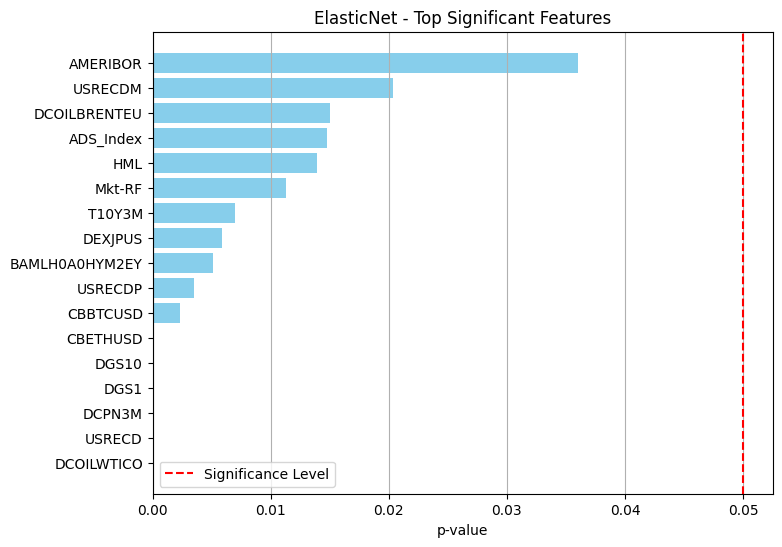

In [ ]:
# Extract p-values
p_values_en = EN_Model.pvalues

# Set a significance level (e.g., 0.05)
significance_level = 0.05

# Get indices of significant features based on p-values
significant_features_indices_en = [i for i, p_val in enumerate(p_values_en) if p_val < significance_level]

# Get the names of significant features and their corresponding p-values
significant_features_en = [X_train.columns[i] for i in significant_features_indices_en]
significant_p_values_en = [p_values_en[i] for i in significant_features_indices_en]

# Sort features based on their p-values
sorted_indices_en = np.argsort(significant_p_values_en)  # Sort indices in ascending order of p-values

sorted_features_en = [significant_features_en[i] for i in sorted_indices_en]
sorted_p_values_en = [significant_p_values_en[i] for i in sorted_indices_en]

# Plotting
plt.figure(figsize=(8, 6))
plt.barh(sorted_features_en, sorted_p_values_en, color='skyblue')
plt.xlabel('p-value')
plt.title('ElasticNet - Top Significant Features')
plt.axvline(x=significance_level, color='red', linestyle='--', label='Significance Level')
plt.legend()
plt.grid(axis='x')
plt.show()


1. AMERIBOR: American Interbank Offered Rate. Changes in this rate could affect the borrowing costs for companies, potentially impacting Meta's financial expenses or the general investment environment.
2. USRECDM: An indicator for the US recession in a particular month. If this is significant, it may suggest that Meta’s stock is sensitive to changes in the business cycle, possibly due to shifts in advertising spend during economic downturns.
3. DCOILBRENTEU: Brent crude oil prices. While Meta is less directly impacted by oil prices, significant oil price changes can affect the broader economy, potentially influencing Meta’s ad revenues.
4. ADS_Index: An index tracking economic activity. A healthy economy usually correlates with higher advertising spending, which would positively impact Meta's revenues.

## XGBoost

In [ ]:

model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model.fit(
    X_train,
    y_train,
    eval_metric="rmse")

y_pred = model.predict(X_test)
MSE = mean_squared_error(y_test, y_pred, squared=False)
RMSE = math.sqrt(MSE)

print(f"XgBoost - RSME = {RMSE}")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XgBoost - RSME = 7.4278819410044274


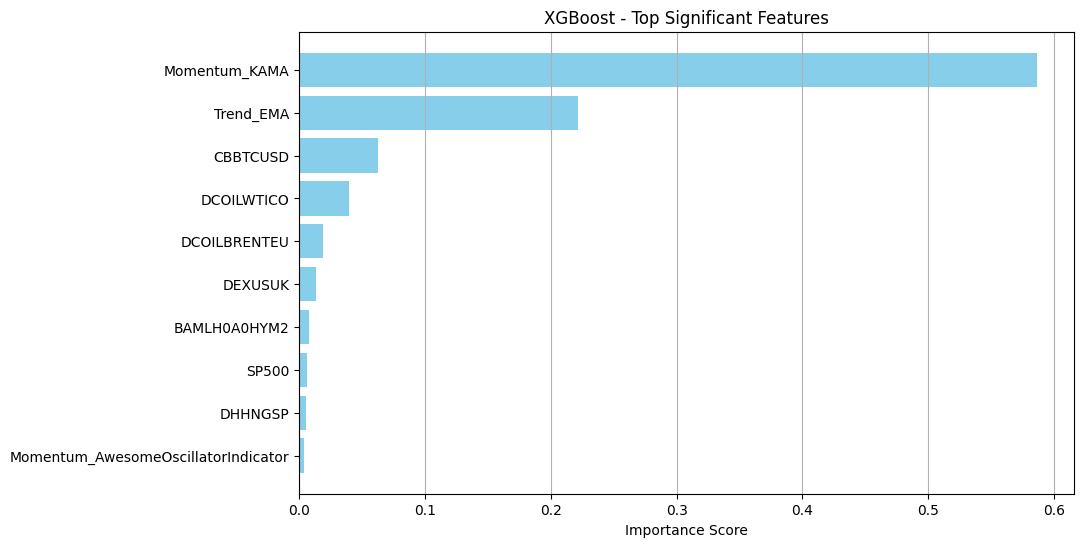

In [ ]:
feature_importances = model.feature_importances_

# Create a dictionary mapping feature names to their importance scores
feature_importance_dict = dict(zip(X_train.columns, feature_importances))

# Sort features based on importance scores
sorted_features = sorted(feature_importance_dict, key=feature_importance_dict.get, reverse=True)

# Number of top features you want to display
top_n = 10  # You can change this value to display a different number of top features

# Extract top features and their importance scores
top_features = sorted_features[:top_n]
top_importance = [feature_importance_dict[feat] for feat in top_features]

# Plotting top features based on importance
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importance, color='skyblue')
plt.xlabel('Importance Score')
plt.title('XGBoost - Top Significant Features')
plt.grid(axis='x')
plt.gca().invert_yaxis()
plt.show()


1. Momentum_KAMA (Kaufman's Adaptive Moving Average): Indicates the significance of market momentum as captured by KAMA in predicting META's stock price. A responsive KAMA could signal the start of trends or reversals which can affect trading decisions.
2. Trend_EMA (Exponential Moving Average): Suggests that the trend factor represented by EMA is influential. A rising EMA might signal a bullish trend for META, and a falling EMA a bearish trend.
3. CBBTCUSD (Bitcoin to USD): Implies that Bitcoin's price movements may have some predictive power over META's stock price, possibly due to similar investor bases or sentiment.
4. DCOILWTICO (West Texas Intermediate Crude Oil): If significant, changes in WTI oil prices could be an indirect indicator of economic health or cost pressures that might affect META's operational costs or ad revenue.